##**TASK**
### Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

## **Sample Dataset** :- https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

In [166]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [167]:
columns = ['ID','Entity','Sentiment','Text']

td = pd.read_csv('/content/drive/MyDrive/PRODIGY_DATA_SCIENCE_INTERNSHIP/DS_TASK_04/twitter_training.csv', names= columns)    #twitter train data
vd = pd.read_csv('/content/drive/MyDrive/PRODIGY_DATA_SCIENCE_INTERNSHIP/DS_TASK_04/twitter_validation.csv', names= columns)    #twitter validation data

In [168]:
td

,ID,Entity,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [169]:
vd

,ID,Entity,Sentiment,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [170]:
# Concatenate the datasets for analysis
df = pd.concat([td, vd], ignore_index=True)
df.head()

,ID,Entity,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [31]:
df.shape

(75682, 4)

In [32]:
#Missing data
df.isnull().sum()

ID             0
Entity         0
Sentiment      0
Text         686
dtype: int64

In [33]:
df.dropna(subset=['Text'], inplace=True)
df.shape

(74996, 4)

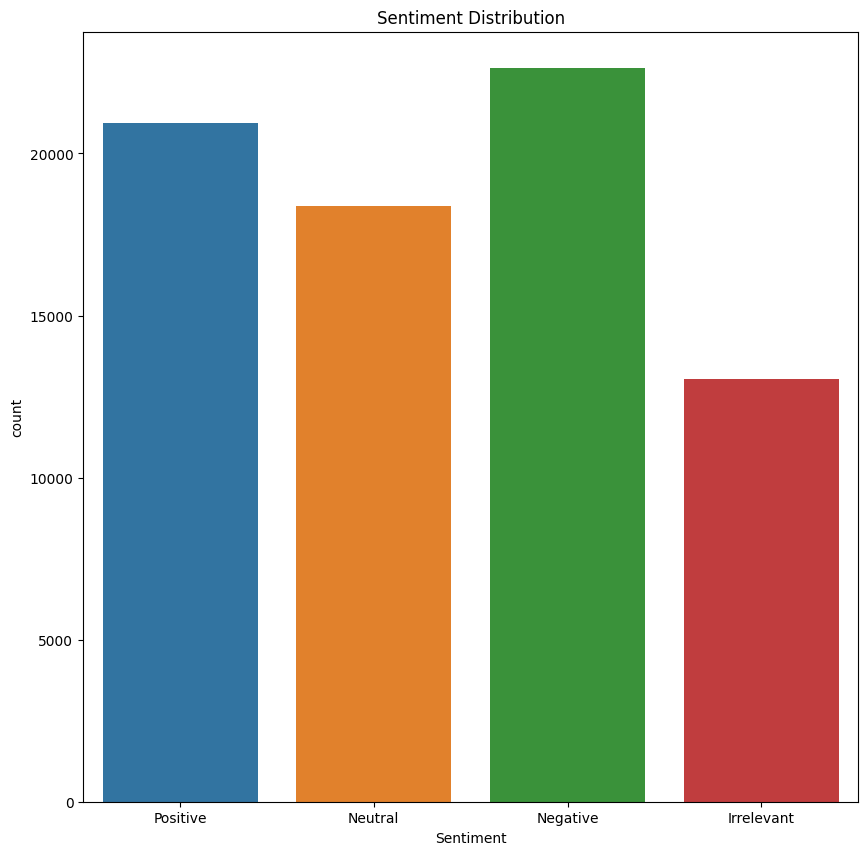

In [35]:
#Sentiment Distribution
plt.figure(figsize=(10, 10))
sns.countplot(x='Sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

In [40]:
sc=df.Sentiment.value_counts()  #sentiment count
sc

Negative      22624
Positive      20932
Neutral       18393
Irrelevant    13047
Name: Sentiment, dtype: int64

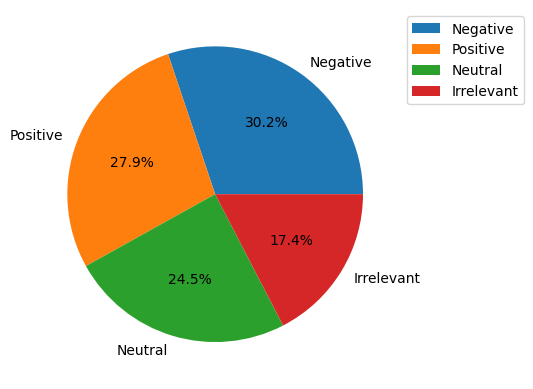

In [190]:
Sentiment = ['Negative','Positive','Neutral','Irrelevant']
plt.pie(sc , labels=Sentiment, autopct='%0.1f%%' )
circle=plt.Circle((0,0),0.0, facecolor='white')
plt.gca().add_patch(circle)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [56]:
ec=df.Entity.value_counts()    #Entity count
ec

LeagueOfLegends                      2414
CallOfDuty                           2407
MaddenNFL                            2406
TomClancysRainbowSix                 2399
Verizon                              2397
Facebook                             2395
ApexLegends                          2389
Microsoft                            2389
WorldOfCraft                         2387
Dota2                                2386
CallOfDutyBlackopsColdWar            2370
NBA2K                                2364
johnson&johnson                      2363
FIFA                                 2362
Overwatch                            2348
TomClancysGhostRecon                 2343
Battlefield                          2342
GrandTheftAuto(GTA)                  2328
PlayStation5(PS5)                    2324
Hearthstone                          2318
CS-GO                                2316
Borderlands                          2313
HomeDepot                            2310
Amazon                            

In [178]:
ecs = ec.sort_values(ascending=False)
ecs

LeagueOfLegends                      2414
CallOfDuty                           2407
MaddenNFL                            2406
TomClancysRainbowSix                 2399
Verizon                              2397
Facebook                             2395
ApexLegends                          2389
Microsoft                            2389
WorldOfCraft                         2387
Dota2                                2386
CallOfDutyBlackopsColdWar            2370
NBA2K                                2364
johnson&johnson                      2363
FIFA                                 2362
Overwatch                            2348
TomClancysGhostRecon                 2343
Battlefield                          2342
GrandTheftAuto(GTA)                  2328
PlayStation5(PS5)                    2324
Hearthstone                          2318
CS-GO                                2316
Borderlands                          2313
HomeDepot                            2310
Amazon                            

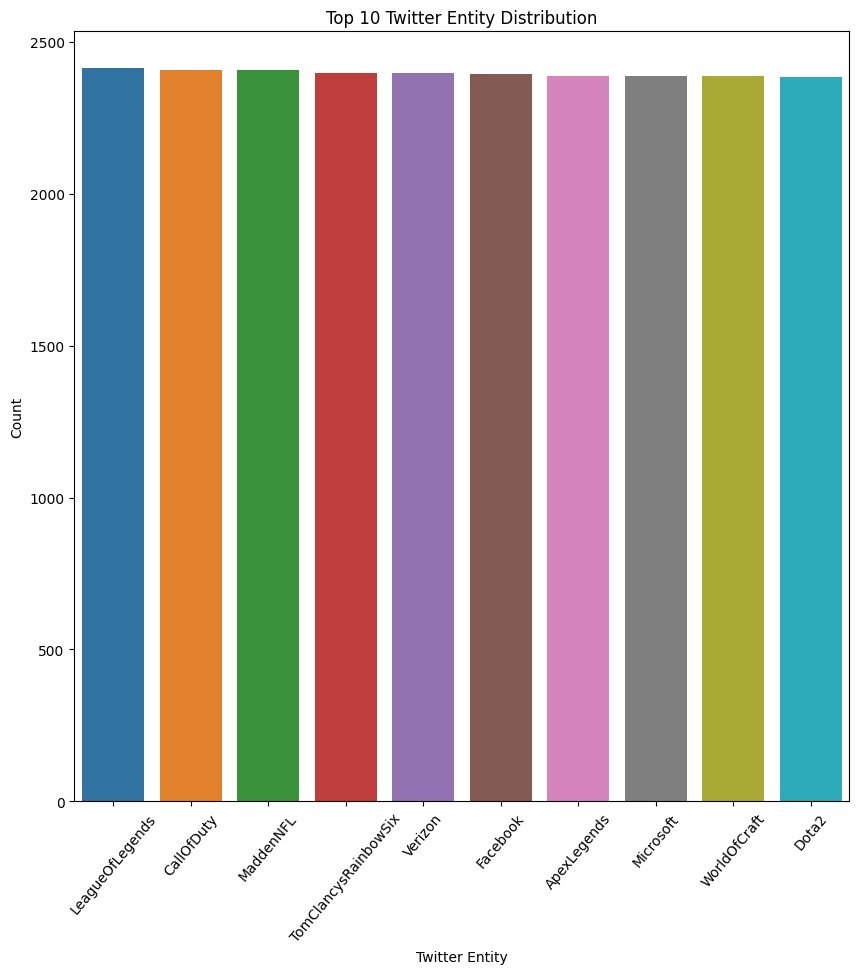

In [55]:
#Top 10 Twitter Entity Distribution
top_entities = df['Entity'].value_counts().nlargest(10)
plt.figure(figsize=(10, 10))
sns.barplot(x=top_entities.index, y=top_entities.values)
plt.title("Top 10 Twitter Entity Distribution")
plt.xlabel("Twitter Entity")
plt.ylabel("Count")
plt.xticks(rotation=50)
plt.show()

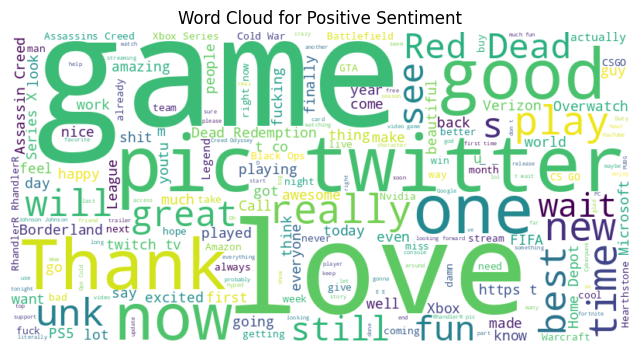

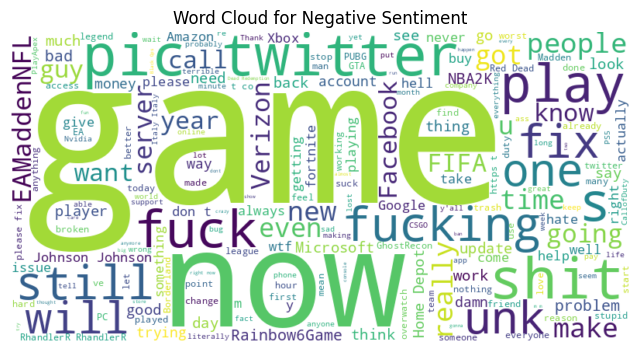

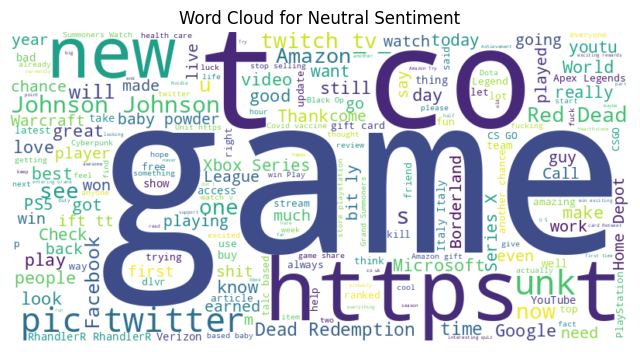

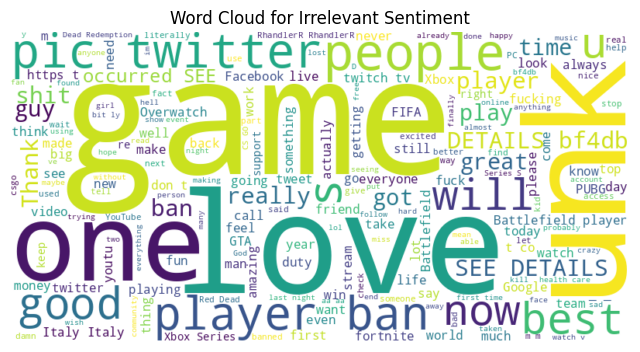

In [174]:
!pip install wordcloud
from wordcloud import WordCloud
# Define a function to generate word cloud for a specific sentiment
def generate_wordcloud(sentiment, text_data):
    plt.figure(figsize=(8, 6))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()

# Filter data by sentiment
positive_text = df[df['Sentiment'] == 'Positive']['Text'].str.cat(sep=' ')
negative_text = df[df['Sentiment'] == 'Negative']['Text'].str.cat(sep=' ')
neutral_text = df[df['Sentiment'] == 'Neutral']['Text'].str.cat(sep=' ')
irrelevant_text = df[df['Sentiment'] == 'Irrelevant']['Text'].str.cat(sep=' ')

# Generate word clouds for each sentiment
generate_wordcloud('Positive', positive_text)
generate_wordcloud('Negative', negative_text)
generate_wordcloud('Neutral', neutral_text)
generate_wordcloud('Irrelevant', irrelevant_text)